In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the data into python

In [2]:
data = pd.read_csv("week10.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


# 2. Check for null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


In [4]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

Dataset doesnot contain any Null values

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


# 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
comment on your observations.

In [6]:
# Grouping the Required features :
data_1 = data[["Hardness",'Sulfate', 'Organic_carbon']]

In [7]:
data_1.describe()

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


[Text(0.5, 1.0, 'Distibution of Organic_carbon')]

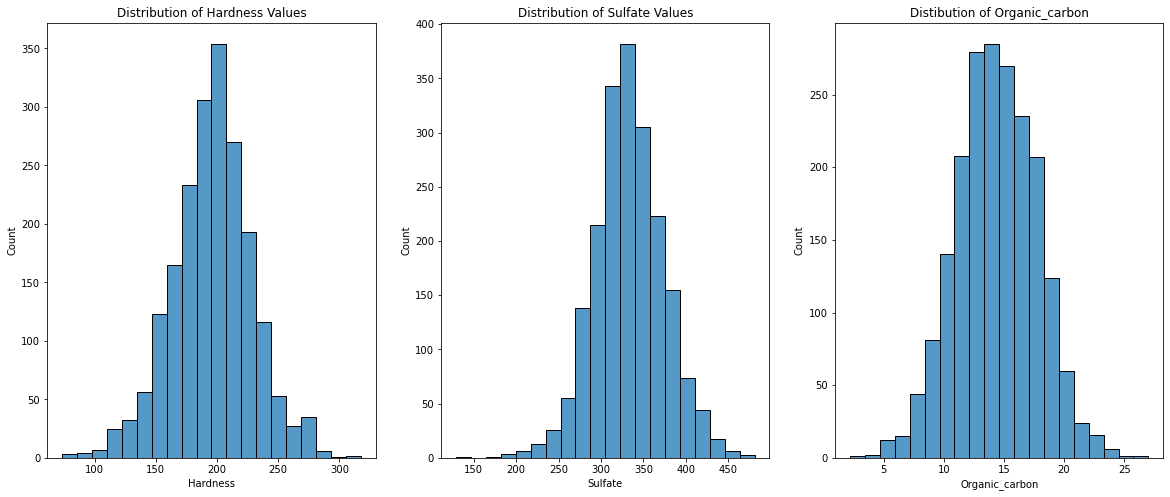

In [8]:
# Plotting Histograms for ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1, ncols= 3, figsize = (20,8))
sns.histplot(bins = 20, data = data_1.Hardness, ax = ax0)
ax0.set(title = "Distribution of Hardness Values")
sns.histplot(bins = 20, data = data_1.Sulfate, ax = ax1)
ax1.set(title = "Distribution of Sulfate Values")
sns.histplot(bins = 20, data = data_1.Organic_carbon, ax = ax2)
ax2.set(title = "Distibution of Organic_carbon")

In [9]:
# Checking for Skewness :
data_1.skew(axis = 0, skipna = True)

Hardness         -0.085237
Sulfate          -0.046558
Organic_carbon   -0.020018
dtype: float64

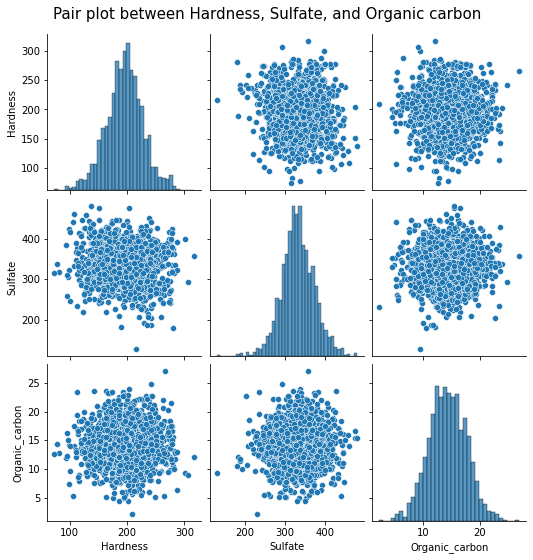

In [10]:
sns.pairplot(data_1, height = 2.5).fig.suptitle("Pair plot between Hardness, Sulfate, and Organic carbon",y=1.03, size = 15);

<AxesSubplot:>

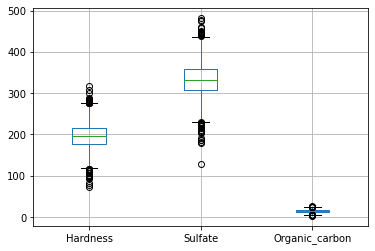

In [20]:
#analysing the outliers of data

data_1.boxplot()


From the above figure, we can witness some outliers. The outliers found in these data set may affect the findings. To avoid this we can apply the IQR rule.

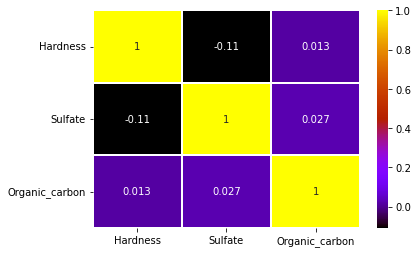

In [12]:
# Finding Correlation & plotting Heatmap :
data_1_corr = data_1.corr()
sns.heatmap(data_1_corr, annot=True, cmap = "gnuplot",linewidths= 0.2)
plt.yticks(rotation = 0);

We can say that the values of the 3 features are Normally distributed, and are mainly centered around their Mean.

The Range of these 3 Features are :

Hardness : 73 - 318 (Rounded off)
Sulfate : 129 - 482
Organic_carbon : 2 -28
The Mean of the 3 features are :

Hardness : 195.968072
Sulfate : 333.224672
Organic_carbon : 14.357709
They're NOT correlated to each other in an Influential manner, i.e. one value is not influencing the value of the other.

Hardness has a Low Positive Correlation with Organic_carbon. ( r = 0.013)
Hardness has a Low Negative Correlation with Sulfate values. ( r = -0.11)
Sulfate has a Low Positive Correlation with Organic_carbon. ( R = 0.027)

# Carry out correlation analysis on the dataset and find the correlation factor
between
a. ph and Chloramines
b. ph and Conductivity

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'ph'),
  Text(0, 1.5, 'Chloramines'),
  Text(0, 2.5, 'Conductivity')])

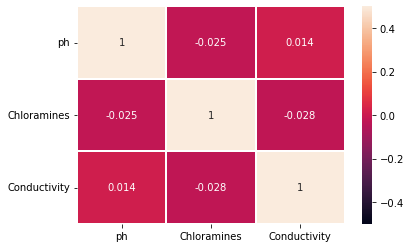

In [23]:
# Transfering the Required Features from Dataset into a new variable.

df2 = data[["ph","Chloramines","Conductivity"]]

# finding the Correlation Coeff:
df2_corr = df2.corr()
sns.heatmap(df2_corr,annot = True,vmin = -0.5, vmax= 0.5,linewidths=0.2)
plt.yticks(rotation = 0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'ph'),
  Text(0, 1.5, 'Hardness'),
  Text(0, 2.5, 'Solids'),
  Text(0, 3.5, 'Chloramines'),
  Text(0, 4.5, 'Sulfate'),
  Text(0, 5.5, 'Conductivity'),
  Text(0, 6.5, 'Organic_carbon'),
  Text(0, 7.5, 'Trihalomethanes'),
  Text(0, 8.5, 'Turbidity')])

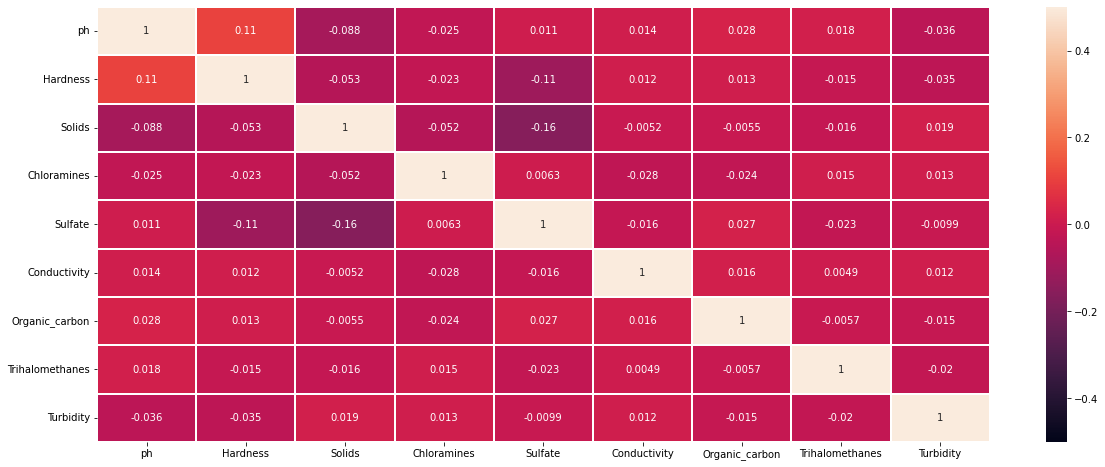

In [24]:
# Generating a Heatmap :
plt.subplots(figsize=(20,8))
data_corr=data.corr()
sns.heatmap(data_corr,annot = True,vmin = -0.5, vmax= 0.5,linewidths=0.2)
plt.yticks(rotation = 0)

In [25]:
data[['ph','Chloramines']].corr()

,ph,Chloramines
ph,1.000000,-0.024768
Chloramines,-0.024768,1.000000


In [26]:
data[['ph','Conductivity']].corr()

,ph,Conductivity
ph,1.000000,0.014128
Conductivity,0.014128,1.000000


1 ) ph and Chloramines :

From Analysing the previously generated Heatmap we can say that :

There is a Low Negative Correlation ( although Negligible) between ph Value and amount of Chloramines. i.e. these values are not influencing each other.

The Correlation Coeff (Pearson) between ph and Chloramines is -0.025.

 

2) ph and Conductivity :

Similarly from the same Heatmap Analysis we can see that :

There is a Low Positive corelation ( although Negligible ) between ph and Conductivity. These values are not dependent on one another.

The Correlation Coeff (Pearson) between ph and Conductivity is 0.014.